# Introdução:
O projeto a seguir visa mostrar como dados de ações podem ser coletados de formas diferetes através de API's de sites com dados financeiros



## Importando dados de ações através da biblioteca yahoo finance

A ações consideradas no estudo de caso estão listadas a seguir:

*   Petróleo Brasileiro S.A. - Petrobras (PETR4.SA)
*   Vale S.A. (VALE3.SA)
*   Banco Bradesco S.A. (BBDC4.SA)
*   The Procter & Gamble Company (PG)

Todos os dados coletados das ações mencionadas serão considerados no intervalos de 10 anos


In [ ]:
# instalando biblioteca yahoo finance
!pip install yfinance

In [ ]:
#importando bibliotecas

import numpy as np
import pandas as pd
import yfinance as yf

ativos = ['PETR4.SA','VALE3.SA','BBDC4.SA','PG']

#periodo considerado

inicio = '2012-12-29'

fim = '2022-12-29'

yf.download('PETR4.SA', start = inicio, end = fim)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,7.983331,30182600
2013-01-03,19.809999,20.400000,19.700001,20.400000,8.271201,30552600
2013-01-04,20.330000,20.620001,20.170000,20.430000,8.283366,36141000
2013-01-07,20.480000,20.670000,19.950001,20.080000,8.141457,28069600
2013-01-08,20.110001,20.230000,19.459999,19.500000,7.906295,29091300
...,...,...,...,...,...,...
2022-12-22,23.900000,24.559999,23.700001,23.990000,23.990000,81894800
2022-12-23,24.129999,25.219999,24.129999,25.120001,25.120001,68387900
2022-12-26,25.120001,25.299999,24.820000,24.940001,24.940001,28765200


In [ ]:

#importando preço de fechamento de todos os ativos considerados no projeto

df = pd.DataFrame()

for i in ativos:
    df[i] = yf.download(i,start = inicio, end = fim)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#informação geral sobre os dados coletados

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2483 entries, 2013-01-02 to 2022-12-28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  2483 non-null   float64
 1   VALE3.SA  2483 non-null   float64
 2   BBDC4.SA  2483 non-null   float64
 3   PG        2421 non-null   float64
dtypes: float64(4)
memory usage: 97.0 KB


In [ ]:
#cinco primeiras linhas do dataframe
df.head()

,PETR4.SA,VALE3.SA,BBDC4.SA,PG
Date,,,,
2013-01-02,7.983331,25.262943,8.398951,51.755665
2013-01-03,8.271201,24.833303,8.900372,51.427483
2013-01-04,8.283366,24.449492,8.750948,51.531914
2013-01-07,8.141459,23.968290,8.706585,51.181355
2013-01-08,7.906295,23.779245,8.736939,51.099297


In [ ]:
#cinco ultimas linhas do dataframe
df.tail()

,PETR4.SA,VALE3.SA,BBDC4.SA,PG
Date,,,,
2022-12-22,23.990000,85.750000,14.88,152.190002
2022-12-23,25.120001,86.320000,15.14,152.619995
2022-12-26,24.940001,87.110001,14.78,NaN
2022-12-27,25.110001,89.190002,14.71,153.949997
2022-12-28,24.799999,88.989998,15.16,151.960007


## Coletando dados de ações através da biblioteca Quandl

No caso da biblioteca Quandl será coletado os seguintes inciadores macroeconômicos

* Dólar americano com cotações em reais (BCB/10813)
* Ouro (BCB/4)
* Certificado de Depósito Interbancário - CDI (BCB/4392)
* Petróleo WTI (EIA/PET_RWTC_D)

Todos os indicadores considerados acima são em um período de 10 anos

In [ ]:
!pip install nasdaq-data-link

In [89]:
import pandas as pd
import nasdaqdatalink as qd

qd.ApiConfig.api_key = "2xFzmurnDuvxTcXYGxL7"

inicio = '2012-12-29'

fim = '2022-12-29'

data = qd.get("BCB/10813", start_date = inicio, end_date = fim)

data


,Value
Date,
2012-12-31,2.0429
2013-01-02,2.0409
2013-01-03,2.0458
2013-01-04,2.0419
2013-01-07,2.0306
...,...
2022-12-23,5.1439
2022-12-26,5.1866
2022-12-27,5.2826


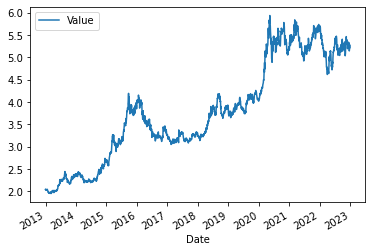

In [90]:
# Gráfico da cotação do dólar em reais ao longo de 10 anos:
data.plot()

In [88]:
indic = ['BCB/10813', 'BCB/4','BCB/4392','EIA/PET_RWTC_D']

df = pd.DataFrame()

for i in indic:
    df[i] = qd.get(i, start_date = inicio, end_date = fim)['Value']

df  

,BCB/10813,BCB/4,BCB/4392,EIA/PET_RWTC_D
Date,,,,
2012-12-31,2.0429,NaN,6.94,91.83
2013-01-02,2.0409,111.5,NaN,93.14
2013-01-03,2.0458,109.5,NaN,92.97
2013-01-04,2.0419,107.9,NaN,93.12
2013-01-07,2.0306,108.0,NaN,93.20
...,...,...,...,...
2022-12-23,5.1439,NaN,NaN,NaN
2022-12-26,5.1866,NaN,NaN,NaN
2022-12-27,5.2826,NaN,NaN,NaN
